In [1]:
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)



In [2]:
ev0end1 = md2mc('''
DFA
I : 0 -> A
A : 0 | 1 -> I
I : 1 -> F
F : 0 | 1 -> I
''')

In [3]:
doev0end1 = dotObj_dfa(ev0end1)

In [4]:
ev0end1

{'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

In [5]:
doev0end1.source

'// do_St1\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tA [label=A peripheries=1 shape=circle]\n\t\tF [label=F peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> A [label=0]\n\t\t\tA -> I [label=0]\n\t\t\tA -> I [label=1]\n\t\t\tI -> F [label=1]\n\t\t\tF -> I [label=0]\n\t\t\tF -> I [label=1]\n}'

In [6]:
is_partially_consistent_dfa(ev0end1)

True

In [7]:
tev0end1 = totalize_dfa(ev0end1)

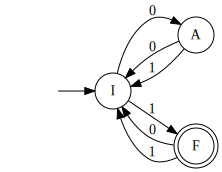

In [8]:
dotObj_dfa_w_bh(tev0end1)

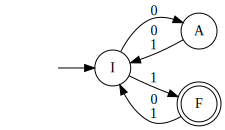

In [9]:
dotObj_dfa_w_bh(tev0end1, FuseEdges=True)

In [10]:
ev0end1

{'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

In [11]:
ev0 = md2mc('''
DFA
IF : 0 -> A
A  : 0 -> IF
''')

In [12]:
ev0

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0'},
 'q0': 'IF'}

In [13]:
dev0 = dotObj_dfa(ev0)

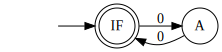

In [14]:
dev0

In [15]:
dev0.source

'// do_St4\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tA [label=A peripheries=1 shape=circle]\n\t\tIF [label=IF peripheries=2 shape=circle]\n\t\t\tEMPTY -> IF\n\t\t\tIF -> A [label=0]\n\t\t\tA -> IF [label=0]\n}'

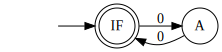

In [16]:
dev0

In [17]:
ev0_bh =  addtosigma_dfa(ev0, set({'1'}))

In [18]:
ev0_bh

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [19]:
ev0_bh_totalize = totalize_dfa(ev0_bh)

In [20]:
ev0_bh

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [21]:
do_ev0_tot = dotObj_dfa_w_bh(ev0_bh_totalize)

In [22]:
do_ev0_tot.source

'// do_St5\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tBH [label=BH peripheries=1 shape=circle]\n\t\tA [label=A peripheries=1 shape=circle]\n\t\tIF [label=IF peripheries=2 shape=circle]\n\t\t\tEMPTY -> IF\n\t\t\tIF -> A [label=0]\n\t\t\tA -> IF [label=0]\n\t\t\tA -> BH [label=1]\n\t\t\tIF -> BH [label=1]\n\t\t\tBH -> BH [label=0]\n\t\t\tBH -> BH [label=1]\n}'

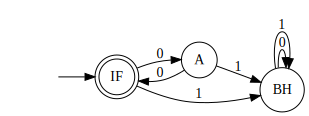

In [23]:
do_ev0_tot

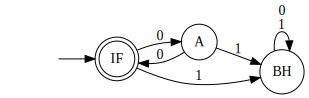

In [24]:
dotObj_dfa_w_bh(ev0_bh_totalize, FuseEdges=True)

<span style="color:blue"> **Here is how we will represent a DFA in Python (taking Figure 3.4's example from the book). You can clearly see how the traits of the DFA are encoded. We prefer a Python dictionary, as it supports a number of convenient operations, and also one can add additional fields easily. ** </span>

In [25]:
DFA_fig34 = { 'Q': {'A', 'IF', 'B'},
              'Sigma': {'0', '1'},
              'Delta': { ('IF', '0'): 'A',
                         ('IF', '1'): 'IF',
                         ('A', '0'): 'B',
                         ('A', '1'): 'A',
                         ('B', '0'): 'IF',
                         ('B', '1'): 'B' },
              'q0': 'IF', 
              'F': {'IF'}   
            }

<span style="color:blue"> **We can now write routines to print DFA using dot. The main routines are listed below.** </span>

* dot_dfa_w_bh : lists all states of a DFA including black-hole states
* dot_dfa      : lists all isNotBH states (see below for a defn), i.e. suppress black-holes
     - Usually there are too many transitions to them and that clutters the view
     

======

In [26]:
# Some tests pertaining to totalize_dfa, is_consistent_dfa, etc

DFA_fig34 = { 'Q': {'A', 'IF', 'B'},
              'Sigma': {'0', '1'},
              'Delta': { ('IF', '0'): 'A',
                         ('IF', '1'): 'IF',
                         ('A', '0'): 'B',
                         ('A', '1'): 'A',
                         ('B', '0'): 'IF',
                         ('B', '1'): 'B' },
              'q0': 'IF', 
              'F': {'IF'}   
            }

def tests_dfa_consist():
    """Some tests wrt DFA routines.
    """
    DFA_fig34_Q     = DFA_fig34["Q"]
    DFA_fig34_Sigma = DFA_fig34["Sigma"]
    randQ           = random.choice(list(DFA_fig34_Q))
    randSym         = random.choice(list(DFA_fig34_Sigma))

    DFA_fig34_deepcopy  = copy.deepcopy(DFA_fig34)

    print('is_consistent_dfa(DFA_fig34) =', 
           is_consistent_dfa(DFA_fig34) )
    print('Removing mapping for ' + 
          "(" + randQ + "," + randSym + ")" + 
          "from DFA_fig34_deepcopy")
    DFA_fig34_deepcopy["Delta"].pop((randQ,randSym))
    print('is_consistent_dfa(DFA_fig34_deepcopy) =', 
         is_consistent_dfa(DFA_fig34_deepcopy) )

    totalized = totalize_dfa(DFA_fig34_deepcopy)
    print ( 'is_consistent_dfa(totalized) =', 
          is_consistent_dfa(totalized) )

    assert(totalized == totalize_dfa(totalized)) # Must pass  

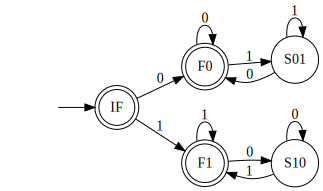

In [27]:
dfaBESame = md2mc('''
DFA !! Begins and ends with same; epsilon allowed
IF  : 0 -> F0
IF  : 1 -> F1
!!
F0  : 0 -> F0
F0  : 1 -> S01
S01 : 1 -> S01
S01 : 0 -> F0
!!
F1  : 1 -> F1
F1  : 0 -> S10
S10 : 0 -> S10
S10 : 1 -> F1
''')
DOdfaBESame = dotObj_dfa(dfaBESame)
DOdfaBESame

In [28]:
DOdfaBESame.source

'// do_St7\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tS01 [label=S01 peripheries=1 shape=circle]\n\t\tS10 [label=S10 peripheries=1 shape=circle]\n\t\tF0 [label=F0 peripheries=2 shape=circle]\n\t\tIF [label=IF peripheries=2 shape=circle]\n\t\tF1 [label=F1 peripheries=2 shape=circle]\n\t\t\tEMPTY -> IF\n\t\t\tIF -> F0 [label=0]\n\t\t\tIF -> F1 [label=1]\n\t\t\tF0 -> F0 [label=0]\n\t\t\tF0 -> S01 [label=1]\n\t\t\tS01 -> S01 [label=1]\n\t\t\tS01 -> F0 [label=0]\n\t\t\tF1 -> F1 [label=1]\n\t\t\tF1 -> S10 [label=0]\n\t\t\tS10 -> S10 [label=0]\n\t\t\tS10 -> F1 [label=1]\n}'

### Let us now administer some tests to print dot-strings generated.

We will demonstrate two ways to print automata: 

1. First generate a dot string via dot_dfa or dot_dfa_w_bh
   (calling the result "dot_string") 
   1. Then use the srcObj = Source(dot_string) call
   2. Thereafter we can display the srcObj object directly into the browser
   3. Or, one can also later convert the dot_string to svg or PDF
2. OR, one can directly generate a dot object via the dotObj_dfa or dotObj_dfa_w_bh call
   (calling the result "dot_object")
   1. Then directly display the dot_object
   2. There are conversions available for dot_object to other formats too

In [29]:
DFA_fig34 = { 'Q': {'A', 'IF', 'B'},
              'Sigma': {'0', '1'},
              'Delta': { ('IF', '0'): 'A',
                         ('IF', '1'): 'IF',
                         ('A', '0'): 'B',
                         ('A', '1'): 'A',
                         ('B', '0'): 'IF',
                         ('B', '1'): 'B' },
              'q0': 'IF', 
              'F': {'IF'}   
            }

def dfa_dot_tests():
    """Some dot-routine related tests.
    """
    dot_string = dot_dfa(DFA_fig34)
    dot_object1 = Source(dot_string)
    return dot_object1.source

Let us test functions step_dfa, run_dfa, and accepts_dfa

In [30]:
# Some tests of step, run, etc.

DFA_fig34 = { 'Q': {'A', 'IF', 'B'},
              'Sigma': {'0', '1'},
              'Delta': { ('IF', '0'): 'A',
                         ('IF', '1'): 'IF',
                         ('A', '0'): 'B',
                         ('A', '1'): 'A',
                         ('B', '0'): 'IF',
                         ('B', '1'): 'B' },
              'q0': 'IF', 
              'F': {'IF'}   
            }

def step_run_accepts_tests():
    print("step_dfa(DFA_fig34, 'IF', '1') = ", 
          step_dfa(DFA_fig34, 'IF', '1'))
    print("step_dfa(DFA_fig34, 'A', '0') = ", 
          step_dfa(DFA_fig34, 'A', '0'))

    print("run_dfa(DFA_fig34, '101001') = ", 
          run_dfa(DFA_fig34, '101001'))
    print("run_dfa(DFA_fig34, '101000') = ", 
          run_dfa(DFA_fig34, '101000'))

    print("accepts_dfa(DFA_fig34, '101001') = ", 
          accepts_dfa(DFA_fig34, '101001')) 
    print("accepts_dfa(DFA_fig34, '101000') = ", 
          accepts_dfa(DFA_fig34, '101000')) 

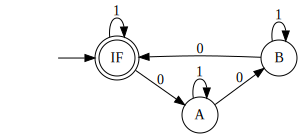

In [31]:
dotObj_dfa(DFA_fig34, "DFA_fig34")

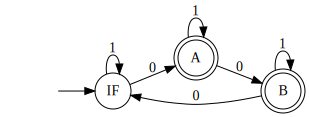

In [32]:
# Run a complementation test
DFA_fig34_comp = comp_dfa(DFA_fig34)
dotObj_dfa(DFA_fig34_comp, "DFA_fig34_comp")
dotObj_dfa(DFA_fig34)
dotObj_dfa(DFA_fig34_comp, "DFA_fig34_comp")

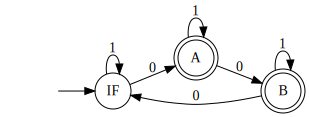

In [33]:
dotObj_dfa(DFA_fig34_comp)

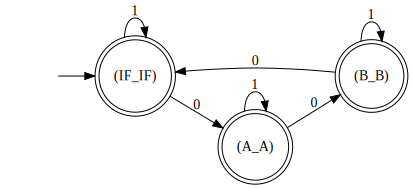

In [34]:
# One more test
du     = union_dfa(DFA_fig34, DFA_fig34_comp)
dotObj_dfa(du, "orig union")
pdu    = pruneUnreach(du)
pdu
pduObj = dotObj_dfa(pdu, "union of 34 and comp")
pduObj



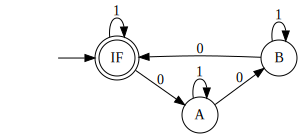

In [35]:
D34 = {   'Q': {'A', 'IF', 'B'},
          'Sigma': {'0', '1'},
          'Delta': { ('IF', '0'): 'A',
                     ('IF', '1'): 'IF',
                     ('A', '0'): 'B',
                     ('A', '1'): 'A',
                     ('B', '0'): 'IF',
                     ('B', '1'): 'B' },
          'q0': 'IF', 
          'F': {'IF'}   
        }

D34bl = { 'Q': {'A', 'IF', 'B', 'A1', 'B1'},
          'Sigma': {'0', '1'},
          'Delta': { ('IF', '0'): 'A',
                     ('IF', '1'): 'IF',
                     ('A', '0'): 'B1',
                     ('A', '1'): 'A1',
                     ('A1', '0'): 'B',
                     ('A1', '1'): 'A',
                     ('B1', '0'): 'IF',
                     ('B1', '1'): 'B',
                     ('B','0') : 'IF',
                     ('B', '1'): 'B1' },
          'q0': 'IF', 
          'F': {'IF'}   
        }


d34 = dotObj_dfa(D34, "D34")
d34 # Display it!

In [36]:
langeq_dfa(D34,D34bl,False)

True

In [37]:
iso_dfa(D34,D34bl)

False

In [38]:
DFA_fig34
d34 = DFA_fig34
d34

{'Delta': {('A', '0'): 'B',
  ('A', '1'): 'A',
  ('B', '0'): 'IF',
  ('B', '1'): 'B',
  ('IF', '0'): 'A',
  ('IF', '1'): 'IF'},
 'F': {'IF'},
 'Q': {'A', 'B', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [39]:
d34c = DFA_fig34_comp
d34c

{'Delta': {('A', '0'): 'B',
  ('A', '1'): 'A',
  ('B', '0'): 'IF',
  ('B', '1'): 'B',
  ('IF', '0'): 'A',
  ('IF', '1'): 'IF'},
 'F': {'A', 'B'},
 'Q': {'A', 'B', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [40]:
iso_dfa(d34,d34)

True

In [41]:
iso_dfa(d34,d34c)

False

In [42]:
d34v1 = {'Delta': {('A', '0'): 'B',
  ('A', '1'): 'B',
  ('B', '0'): 'IF',
  ('B', '1'): 'B',
  ('IF', '0'): 'A',
  ('IF', '1'): 'IF'},
 'F': {'IF'},
 'Q': {'A', 'B', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

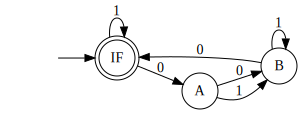

In [43]:
dotObj_dfa(d34v1)

In [44]:
d34v2 = {'Delta': {('A', '0'): 'B',
  ('A', '1'): 'B',
  ('B', '0'): 'IF',
  ('B', '1'): 'B',
  ('IF', '0'): 'A',
  ('IF', '1'): 'IF'},
 'F': {'IF', 'B'},
 'Q': {'A', 'B', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [45]:
iso_dfa(d34,d34v1)

False

In [46]:
iso_dfa(d34,d34v2)

False

In [47]:
iso_dfa(d34v1,d34v2)

False

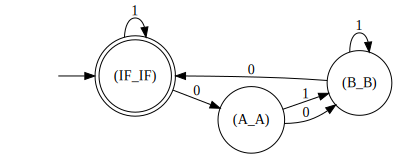

In [48]:
div1 = pruneUnreach(intersect_dfa(d34v1,d34v2))
dotObj_dfa(div1)

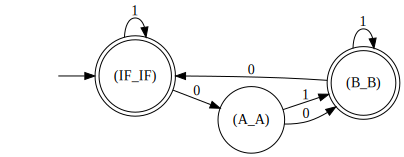

In [49]:
div2 = pruneUnreach(union_dfa(d34v1,d34v2))
dotObj_dfa(div2)

In [50]:
iso_dfa(div1,div2)

False

In [51]:
langeq_dfa(div1,div2,True)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[(('IF', 'IF'), ('IF', 'IF')), (('A', 'A'), ('A', 'A')), (('B', 'B'), ('B', 'B'))]


False

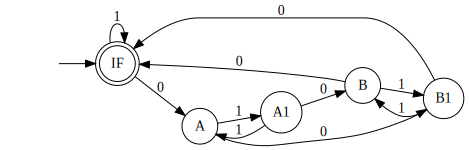

In [52]:
d34bl = dotObj_dfa(D34bl, "D34bl")
d34bl # Display it!

In [53]:
d34bl = dotObj_dfa(D34bl, FuseEdges=True, dfaName="D34bl")

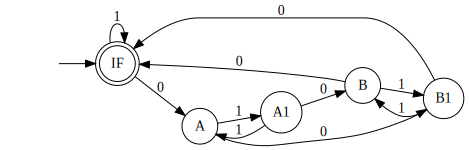

In [54]:
d34bl

In [55]:
iso_dfa(D34,D34bl)

False

In [56]:
langeq_dfa(D34,D34bl)

True

#### 

In [57]:
du

{'Delta': {(('A', 'A'), '0'): ('B', 'B'),
  (('A', 'A'), '1'): ('A', 'A'),
  (('B', 'B'), '0'): ('IF', 'IF'),
  (('B', 'B'), '1'): ('B', 'B'),
  (('IF', 'IF'), '0'): ('A', 'A'),
  (('IF', 'IF'), '1'): ('IF', 'IF')},
 'F': {('A', 'A'), ('B', 'B'), ('IF', 'IF')},
 'Q': {('A', 'A'), ('B', 'B'), ('IF', 'IF')},
 'Sigma': {'0', '1'},
 'q0': ('IF', 'IF')}

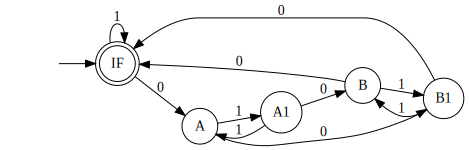

In [58]:
dotObj_dfa(pruneUnreach(D34bl), "D34bl")

In [59]:
### DFA minimization (another example)

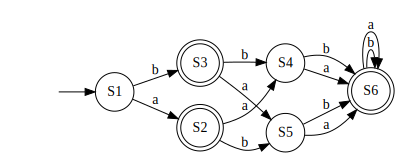

In [60]:
Bloat1 = {'Q': {'S1', 'S3', 'S2', 'S5', 'S4', 'S6' },
          'Sigma': {'b', 'a'},
          'Delta': { ('S1','b') : 'S3',
                     ('S1','a') : 'S2',
                     ('S3','a') : 'S5',
                     ('S2','a') : 'S4',
                     ('S3','b') : 'S4',
                     ('S2','b') : 'S5',
                     ('S5','b') : 'S6',
                     ('S5','a') : 'S6',
                     ('S4','b') : 'S6',
                     ('S4','a') : 'S6',
                     ('S6','b') : 'S6',
                     ('S6','a') : 'S6' },
          'q0': 'S1', 
          'F': {'S2','S3','S6'}   
        }


Bloat1O = dotObj_dfa(Bloat1, dfaName="Bloat1")
Bloat1O # Display it!

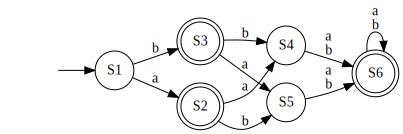

In [61]:
dotObj_dfa(Bloat1, FuseEdges=True, dfaName="Bloat1")

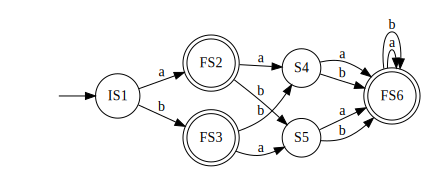

In [62]:
bloated_dfa = md2mc('''
DFA
IS1 : a -> FS2
IS1 : b -> FS3
FS2 : a -> S4
FS2 : b -> S5
FS3 : a -> S5
FS3 : b -> S4
S4  : a | b -> FS6
S5  : a | b -> FS6
FS6 : a | b -> FS6
''')
dotObj_dfa(bloated_dfa)

In [63]:
dotObj_dfa(bloated_dfa).source

'// do_St22\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tIS1 [label=IS1 peripheries=1 shape=circle]\n\t\tS4 [label=S4 peripheries=1 shape=circle]\n\t\tS5 [label=S5 peripheries=1 shape=circle]\n\t\tFS2 [label=FS2 peripheries=2 shape=circle]\n\t\tFS3 [label=FS3 peripheries=2 shape=circle]\n\t\tFS6 [label=FS6 peripheries=2 shape=circle]\n\t\t\tEMPTY -> IS1\n\t\t\tIS1 -> FS2 [label=a]\n\t\t\tIS1 -> FS3 [label=b]\n\t\t\tFS2 -> S4 [label=a]\n\t\t\tFS2 -> S5 [label=b]\n\t\t\tFS3 -> S5 [label=a]\n\t\t\tFS3 -> S4 [label=b]\n\t\t\tS4 -> FS6 [label=a]\n\t\t\tS4 -> FS6 [label=b]\n\t\t\tS5 -> FS6 [label=a]\n\t\t\tS5 -> FS6 [label=b]\n\t\t\tFS6 -> FS6 [label=a]\n\t\t\tFS6 -> FS6 [label=b]\n}'


Now, here is how the computation proceeds for this example:
-------------------------------------------------------- 
 
 <br>
 
<font size="3"> 


```
 
Frame-0                  Frame-1                   Frame-2                    
                                                                                                     
S2  -1                   S2   0                    S2   0                     

S3  -1  -1               S3   0  -1                S3   0  -1                 

S4  -1  -1  -1           S4  -1   0   0            S4   2   0   0             

S5  -1  -1  -1  -1       S5  -1   0   0  -1        S5   2   0   0  -1         

S6  -1  -1  -1  -1  -1   S6   0  -1  -1   0   0    S6   0   1   1   0   0     

    S1  S2  S3  S4  S5       S1  S2  S3  S4  S5        S1  S2  S3  S4  S5        

Initial                  0-distinguishable         1-distinguishable                         
     
     
Frame-3                 Frame-4     
                        =
                        Frame-3

S2   0

S3   0  -1

S4   2   0   0

S5   2   0   0  -1

S6   0   1   1   0   0

    S1  S2  S3  S4  S5
    
2-distinguishable 
     
```
</font>

Here is the algorithm, going frame by frame.

- Initial Frame: 

     The initial frame is drawn to clash all _combinations_ of states taken two at a time.
     Since we have 6 states, we have $6\choose 2$ = $15$ entries. We put a -1 against each
     such pair to denote that they have not been found distinguishable yet.

- Frame *0-distinguishable*: We now put a 0 where a pair of states is 0-distinguishable. This means the states are distinguisable after consuming $\varepsilon$. This of course means that the states are themselves distinguishable. This is only possible if one is a final state and the other is not (in that case, one state, after consuming $\varepsilon$ accepts_dfa, and another state after consuming $\varepsilon$ does not accept.

  - So for instance, notice that (S3,S1) and (S4,S2) are 0-distinguishable, meaning that one is a final and the other is a non-final state.

- Frame *1-distinguishable*: We now put a 1 where a pair of states is 1-distinguishable. This means the states are distinguisable after consuming a string of length $1$ (a single symbol). This is only possible if one state transitions to a final state and the other transitions to a non-final state after consuming a member of $\Sigma$. 

  State pairs (S6,S2) and (S6,S3) are of this kind. While both S6 and S2 are final states (hence _0-indistinguishable_), after consuming an 'a' (or a 'b') they respectively go to a final/non-final state.
 This means that

  - after processing **the same symbol** one state -- let's say pre_p -- finds itself landing in a state p and another state  -- let's say pre_q -- finds itself landing in a state q such that (p,q) is 0-distinguishable.
  
  - When this happens, states pre-p and pre-q are **1-distinguishable**.

- Frame *2-distinguishable*: We now put a 2 where a pair of states is 2-distinguishable. This means the states are distinguisable after consuming a string of length $2$ (a string of length $2$). This is only possible if one state transitions to a state (say p) and the other transitions to state (say q) after consuming a member of $\Sigma$ such that (p,q) is **1-distinguishable**. State pairs (S5,S1) and (S4,S1) are 2-distinguishable because

  - after processing **the same symbol** one state -- let's say pre_p -- finds itself landing in a state p and another state  -- let's say pre_q -- finds itself landing in a state q such that (p,q) is 0-distinguishable.
  
  - When this happens, states pre-p and pre-q are **1-distinguishable**.
  
  - One example is this:
  
    - S5 and S1 are 2-distinguishable.
    
    - This is because after seeing an 'aa', S1 lands in a non-final state while S5 lands in a final state
    
    - Observe that "aa" = "a" + "a" . Thus, after eating the first "a", S1 lands in S2 while S5 lands in S6, and (S2,S6) have already been deemed 1-distinguishable.
    
    - Thus, when we mark (S5,S1) as 2-distinguishable, we are sending the matrix entry at (S5,S2) from 
      -1 to 2
 


  - Now, in search of 3-distinguishability, we catch hold of all pairs in the matrix and see if we can send another -1 entry to "3". This appears not to happen. 
  
     - Thus, if (S2,S3) is pushed via any sequence of symbols (any string) of any length, it
       always stays in the same type of state. Thus, after seeing 'ababba', S2 is in S6, while S3 
        is also in S6.


 - Thus, given no changes in the matrix, we stop.

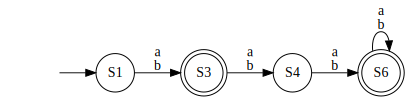

In [64]:
dotObj_dfa(min_dfa(Bloat1), FuseEdges=True, dfaName="shrunkBloat1")

In [65]:
min_bloat = min_dfa(Bloat1)
dotObj_dfa(min_bloat).source

'// do_St23\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tS4 [label=S4 peripheries=1 shape=circle]\n\t\tS1 [label=S1 peripheries=1 shape=circle]\n\t\tS3 [label=S3 peripheries=2 shape=circle]\n\t\tS6 [label=S6 peripheries=2 shape=circle]\n\t\t\tEMPTY -> S1\n\t\t\tS1 -> S3 [label=b]\n\t\t\tS1 -> S3 [label=a]\n\t\t\tS3 -> S4 [label=a]\n\t\t\tS3 -> S4 [label=b]\n\t\t\tS4 -> S6 [label=b]\n\t\t\tS4 -> S6 [label=a]\n\t\t\tS6 -> S6 [label=b]\n\t\t\tS6 -> S6 [label=a]\n}'

In [66]:
prd34b1 = pruneUnreach(D34bl)

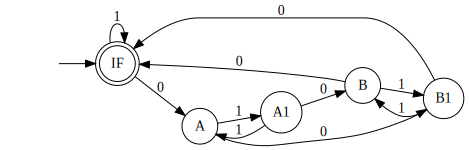

In [67]:
dotObj_dfa(prd34b1, "prd34b1")

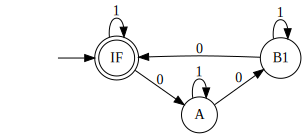

In [68]:
dotObj_dfa(min_dfa(prd34b1), "prd34b1min")

In [69]:
third1dfa=md2mc(src="File", fname="machines/dfafiles/thirdlastis1.dfa")

In [70]:
third1dfa

{'Delta': {('F100', '0'): 'S000',
  ('F100', '1'): 'S001',
  ('F101', '0'): 'S010',
  ('F101', '1'): 'S011',
  ('F110', '0'): 'F100',
  ('F110', '1'): 'F101',
  ('F111', '0'): 'F110',
  ('F111', '1'): 'F111',
  ('I', '0'): 'S0',
  ('I', '1'): 'S1',
  ('S0', '0'): 'S00',
  ('S0', '1'): 'S01',
  ('S00', '0'): 'S000',
  ('S00', '1'): 'S001',
  ('S000', '0'): 'S000',
  ('S000', '1'): 'S001',
  ('S001', '0'): 'S010',
  ('S001', '1'): 'S011',
  ('S01', '0'): 'S010',
  ('S01', '1'): 'S011',
  ('S010', '0'): 'F100',
  ('S010', '1'): 'F101',
  ('S011', '0'): 'F110',
  ('S011', '1'): 'F111',
  ('S1', '0'): 'S10',
  ('S1', '1'): 'S11',
  ('S10', '0'): 'F100',
  ('S10', '1'): 'F101',
  ('S11', '0'): 'F110',
  ('S11', '1'): 'F111'},
 'F': {'F100', 'F101', 'F110', 'F111'},
 'Q': {'F100',
  'F101',
  'F110',
  'F111',
  'I',
  'S0',
  'S00',
  'S000',
  'S001',
  'S01',
  'S010',
  'S011',
  'S1',
  'S10',
  'S11'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

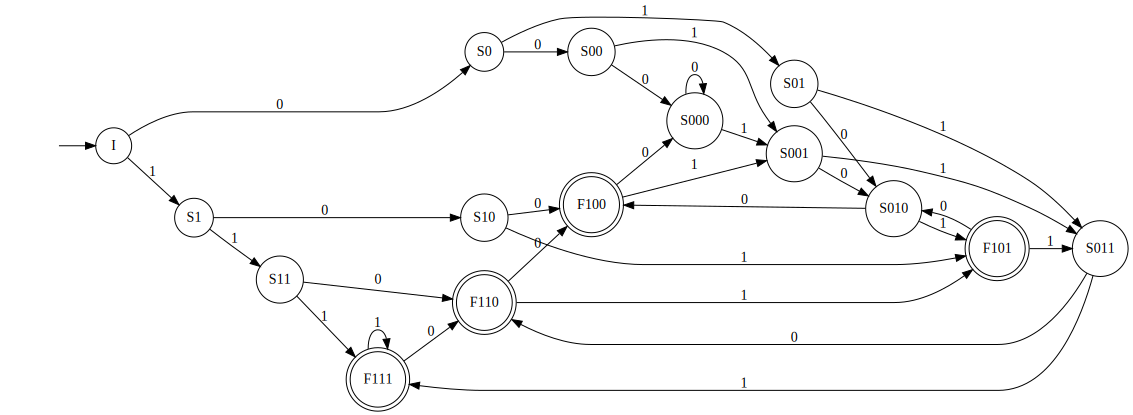

In [71]:
dotObj_dfa(third1dfa)

In [72]:
ends0101 =\
"\
DFA\
 \
I     : 0 -> S0 \
I     : 1 -> I \
S0    : 0 -> S0 \
S0    : 1 -> S01 \
S01   : 0 -> S010 \
S01   : 1 -> I \
S010  : 0 -> S0 \
S010  : 1 -> F0101 \
F0101 : 0 -> S010 \
F0101 : 1 -> I \
"

In [73]:
ends0101

'DFA I     : 0 -> S0 I     : 1 -> I S0    : 0 -> S0 S0    : 1 -> S01 S01   : 0 -> S010 S01   : 1 -> I S010  : 0 -> S0 S010  : 1 -> F0101 F0101 : 0 -> S010 F0101 : 1 -> I '

In [74]:
dfaends0101=md2mc(ends0101)

In [75]:
dfaends0101

{'Delta': {('F0101', '0'): 'S010',
  ('F0101', '1'): 'I',
  ('I', '0'): 'S0',
  ('I', '1'): 'I',
  ('S0', '0'): 'S0',
  ('S0', '1'): 'S01',
  ('S01', '0'): 'S010',
  ('S01', '1'): 'I',
  ('S010', '0'): 'S0',
  ('S010', '1'): 'F0101'},
 'F': {'F0101'},
 'Q': {'F0101', 'I', 'S0', 'S01', 'S010'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

In [76]:
dped1 = md2mc(src="File", fname="machines/dfafiles/pedagogical1.dfa")
#machines/dfafiles/pedagogical1.dfa

In [77]:
dped1

{'Delta': {('A', '0'): 'B',
  ('A', '1'): 'B',
  ('B', '0'): 'IF',
  ('B', '1'): 'F',
  ('F', '0'): 'B',
  ('F', '1'): 'B',
  ('IF', '0'): 'A',
  ('IF', '1'): 'B'},
 'F': {'F', 'IF'},
 'Q': {'A', 'B', 'F', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

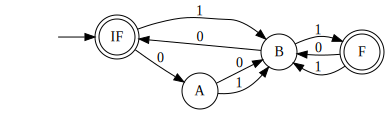

In [78]:
dotObj_dfa(dped1)

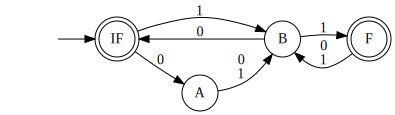

In [79]:
dotObj_dfa(dped1, FuseEdges=True)

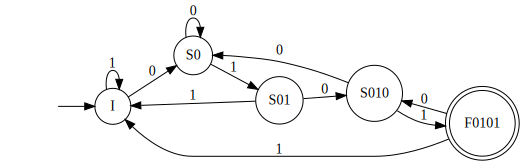

In [80]:
dotObj_dfa(md2mc(ends0101))

In [81]:
thirdlastis1=md2mc(src="File", fname="machines/dfafiles/thirdlastis1.dfa")
#machines/dfafiles/thirdlastis1.dfa

In [82]:
thirdlastis1

{'Delta': {('F100', '0'): 'S000',
  ('F100', '1'): 'S001',
  ('F101', '0'): 'S010',
  ('F101', '1'): 'S011',
  ('F110', '0'): 'F100',
  ('F110', '1'): 'F101',
  ('F111', '0'): 'F110',
  ('F111', '1'): 'F111',
  ('I', '0'): 'S0',
  ('I', '1'): 'S1',
  ('S0', '0'): 'S00',
  ('S0', '1'): 'S01',
  ('S00', '0'): 'S000',
  ('S00', '1'): 'S001',
  ('S000', '0'): 'S000',
  ('S000', '1'): 'S001',
  ('S001', '0'): 'S010',
  ('S001', '1'): 'S011',
  ('S01', '0'): 'S010',
  ('S01', '1'): 'S011',
  ('S010', '0'): 'F100',
  ('S010', '1'): 'F101',
  ('S011', '0'): 'F110',
  ('S011', '1'): 'F111',
  ('S1', '0'): 'S10',
  ('S1', '1'): 'S11',
  ('S10', '0'): 'F100',
  ('S10', '1'): 'F101',
  ('S11', '0'): 'F110',
  ('S11', '1'): 'F111'},
 'F': {'F100', 'F101', 'F110', 'F111'},
 'Q': {'F100',
  'F101',
  'F110',
  'F111',
  'I',
  'S0',
  'S00',
  'S000',
  'S001',
  'S01',
  'S010',
  'S011',
  'S1',
  'S10',
  'S11'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

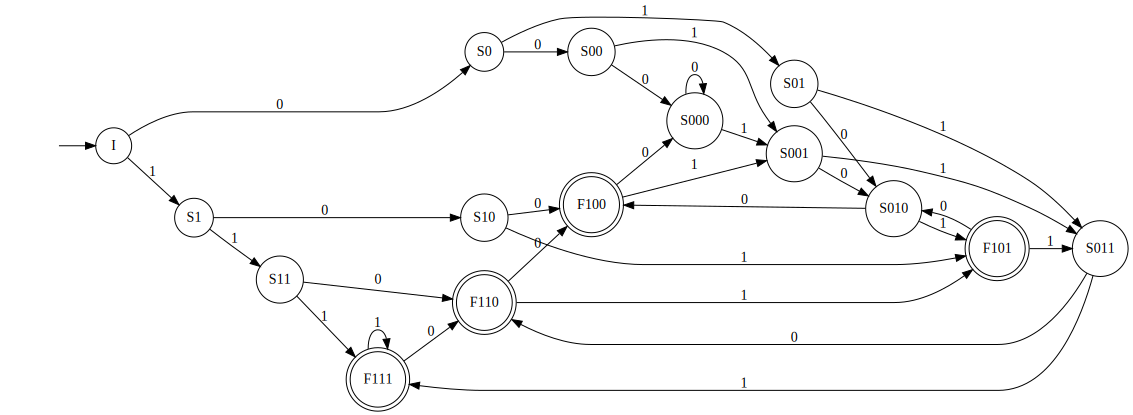

In [83]:
dotObj_dfa(thirdlastis1)

In [84]:
dped1=md2mc(src="File", fname="machines/dfafiles/pedagogical2.dfa")
#machines/dfafiles/pedagogical2.dfa

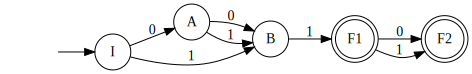

In [85]:
dotObj_dfa(dped1)

In [86]:
secondLastIs1 = md2mc('''
!!------------------------------------------------------------
!! This DFA looks for patterns of the form ....1.
!! i.e., the second-last (counting from the end-point) is a 1
!!
!! DFAs find such patterns "very stressful to handle",
!! as they are kept guessing of the form  'are we there yet?'
!! 'are we seeing the second-last' ?
!! They must keep all the failure options at hand. Even after
!! a 'fleeting glimpse' of the second-last, more inputs can
!! come barreling-in to make that "lucky 1" a non-second-last.
!!
!! We take 7 states in the DFA solution.
!!------------------------------------------------------------

DFA
!!------------------------------------------------------------
!! State : in ->  tostate !! comment
!!------------------------------------------------------------

I   :  0 ->  S0  !! Enter at init state I
I   :  1 ->  S1  !! Record bit seen in state letter
                     !! i.e., S0 means "state after seeing a 0"
			 
S0  :  0 ->  S00 !! continue recording input seen
S0  :  1 ->  S01 !! in state-letter. This is a problem-specific
                 !! way of compressing the input seen so far.

S1  :  0 ->  F10 !! We now have a "second last" available!
S1  :  1 ->  F11 !! Both F10 and F10 are "F" (final)

S00 :  0 ->  S00 !! History of things seen is still 00
S00 :  1 ->  S01 !! Remember 01 in the state

S01 :  0 ->  F10 !! We again have a second-last of 1
S01 :  1 ->  F11 !! We are in F11 because of 11 being last seen

F10 :  0 ->  S00 !! The second-last 1 gets pushed-out
F10 :  1 ->  S01 !! The second-last 1 gets pushed-out here too

F11 :  0 ->  F10 !! Still we have a second-last 1
F11 :  1 ->  F11 !! Stay in F11, as last two seen are 11

!!------------------------------------------------------------
''')

In [87]:
from math import floor, log, pow
def nthnumeric(N, Sigma={'a','b'}):
    """Assume Sigma is a 2-sized list/set of chars (default {'a','b'}). 
       Produce the Nth string in numeric order, where N >= 0.
       Idea : Given N, get b = floor(log_2(N+1)) - need that 
       many places; what to fill in the places is the binary 
       code for N - (2^b - 1) with 0 as Sigma[0] and 1 as Sigma[1].    
    """
    if (type(Sigma)==set):
       S = list(Sigma)
    else:
       assert(type(Sigma)==list
       ), "Expected to be given set/list for arg2 of nthnumeric."
       S = Sigma
    assert(len(Sigma)==2
          ),"Expected to be given a Sigma of length 2."
    if(N==0):
        return ''
    else:
        width = floor(log(N+1, 2))
        tofill = int(N - pow(2, width) + 1)
        relevant_binstr = bin(tofill)[2::] # strip the 0b 
                                           # in the leading string
        len_to_makeup = width - len(relevant_binstr)
        return (S[0]*len_to_makeup + 
                shomo(relevant_binstr,
                      lambda x: S[1] if x=='1' else S[0]))

In [88]:
nthnumeric(20,['0','1'])

'0101'

In [89]:
run_dfa(secondLastIs1, '0101')

'S01'

In [90]:
accepts_dfa(secondLastIs1, '0101')

False

In [91]:
tests = [ nthnumeric(i, ['0','1']) for i in range(12) ]
for t in tests:
    if accepts_dfa(secondLastIs1, t):
        print("This DFA accepts ", t)
    else:
        print("This DFA rejects ", t)

This DFA rejects  
This DFA rejects  0
This DFA rejects  1
This DFA rejects  00
This DFA rejects  01
This DFA accepts  10
This DFA accepts  11
This DFA rejects  000
This DFA rejects  001
This DFA accepts  010
This DFA accepts  011
This DFA rejects  100


In [92]:
help(run_dfa)

Help on function run_dfa in module jove.Def_DFA:

run_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: next state of D["q0"] via string s



This is an extensive illustration of union, intersection and complementation, DFA minimization, isomorphism test, language equivalence test, and an application of DeMorgan's law

In [93]:
dfaOdd1s = md2mc('''
DFA
I : 0 -> I
I : 1 -> F
F : 0 -> F 
F : 1 -> I
''')

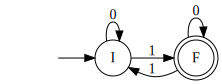

In [94]:
dotObj_dfa(dfaOdd1s)

In [95]:
dotObj_dfa(dfaOdd1s).source

'// do_St33\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tF [label=F peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> I [label=0]\n\t\t\tI -> F [label=1]\n\t\t\tF -> F [label=0]\n\t\t\tF -> I [label=1]\n}'

In [96]:
ends0101 = md2mc('''
DFA 
I     : 0 -> S0  
I     : 1 -> I 
S0    : 0 -> S0 
S0    : 1 -> S01 
S01   : 0 -> S010 
S01   : 1 -> I 
S010  : 0 -> S0 
S010  : 1 -> F0101 
F0101 : 0 -> S010 
F0101 : 1 -> I 
''')

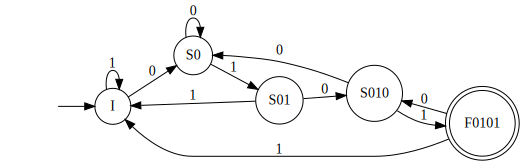

In [97]:
dotObj_dfa(ends0101)

In [98]:
dotObj_dfa(ends0101).source

'// do_St35\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tS0 [label=S0 peripheries=1 shape=circle]\n\t\tS01 [label=S01 peripheries=1 shape=circle]\n\t\tS010 [label=S010 peripheries=1 shape=circle]\n\t\tF0101 [label=F0101 peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> S0 [label=0]\n\t\t\tI -> I [label=1]\n\t\t\tS0 -> S0 [label=0]\n\t\t\tS0 -> S01 [label=1]\n\t\t\tS01 -> S010 [label=0]\n\t\t\tS01 -> I [label=1]\n\t\t\tS010 -> S0 [label=0]\n\t\t\tS010 -> F0101 [label=1]\n\t\t\tF0101 -> S010 [label=0]\n\t\t\tF0101 -> I [label=1]\n}'

In [99]:
odd1sORends0101 = union_dfa(dfaOdd1s,ends0101)

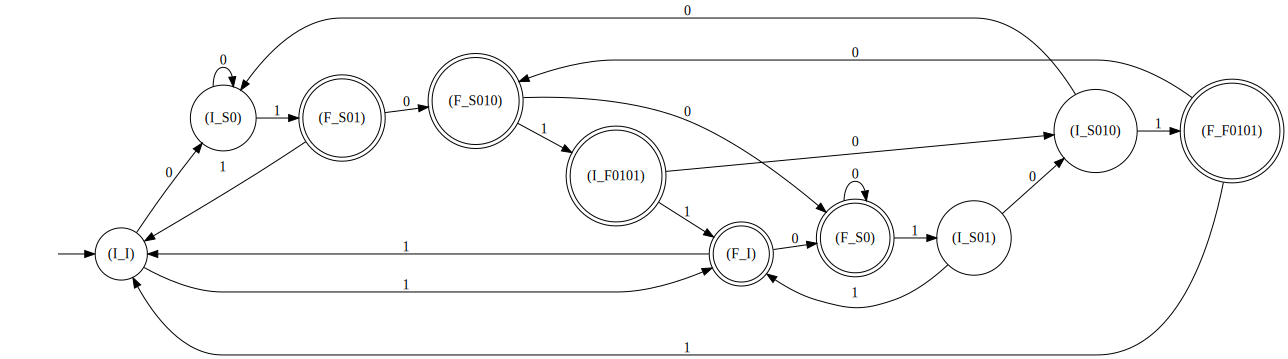

In [100]:
dotObj_dfa(odd1sORends0101)

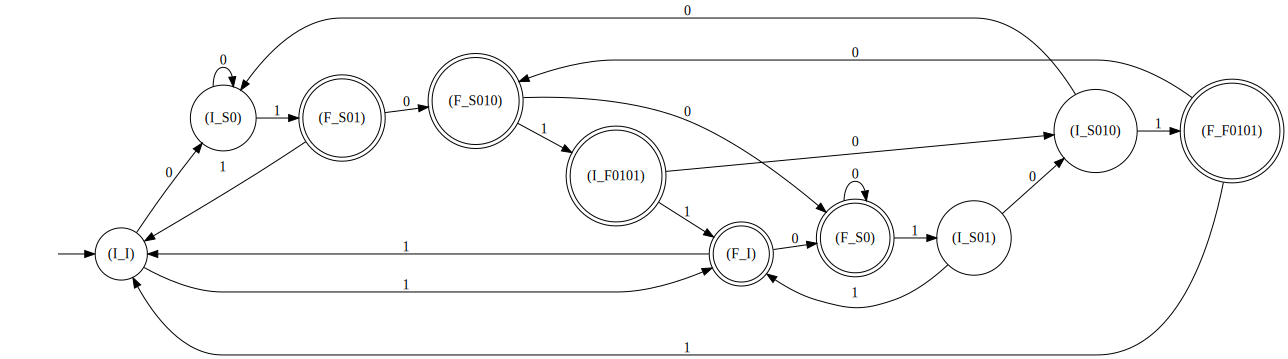

In [101]:
dotObj_dfa(odd1sORends0101)

In [102]:
dotObj_dfa(odd1sORends0101).source

'// do_St38\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\t"\\(I_S0\\)" [label="\\(I_S0\\)" peripheries=1 shape=circle]\n\t\t"\\(I_S010\\)" [label="\\(I_S010\\)" peripheries=1 shape=circle]\n\t\t"\\(I_I\\)" [label="\\(I_I\\)" peripheries=1 shape=circle]\n\t\t"\\(I_S01\\)" [label="\\(I_S01\\)" peripheries=1 shape=circle]\n\t\t"\\(I_F0101\\)" [label="\\(I_F0101\\)" peripheries=2 shape=circle]\n\t\t"\\(F_S0\\)" [label="\\(F_S0\\)" peripheries=2 shape=circle]\n\t\t"\\(F_S01\\)" [label="\\(F_S01\\)" peripheries=2 shape=circle]\n\t\t"\\(F_F0101\\)" [label="\\(F_F0101\\)" peripheries=2 shape=circle]\n\t\t"\\(F_I\\)" [label="\\(F_I\\)" peripheries=2 shape=circle]\n\t\t"\\(F_S010\\)" [label="\\(F_S010\\)" peripheries=2 shape=circle]\n\t\t\tEMPTY -> "\\(I_I\\)"\n\t\t\t"\\(F_S0\\)" -> "\\(F_S0\\)" [label=0]\n\t\t\t"\\(I_S01\\)" -> "\\(I_S010\\)" [label=0]\n\t\t\t"\\(I_S0\\)" -> "\\(F_S01\\)" [label=1]\n\t\t\t"\\(I_S010\\)" -> "\\(F_F0101\\)" [label=1]\n\t\t\t"\\(I_S01

In [103]:
Minodd1sORends0101 = min_dfa(odd1sORends0101)

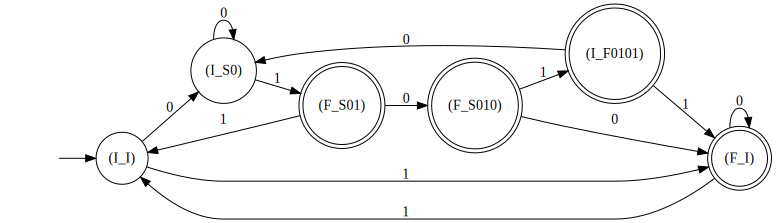

In [104]:
dotObj_dfa(Minodd1sORends0101)

In [105]:
dotObj_dfa(Minodd1sORends0101).source

'// do_St40\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\t"\\(I_S0\\)" [label="\\(I_S0\\)" peripheries=1 shape=circle]\n\t\t"\\(I_I\\)" [label="\\(I_I\\)" peripheries=1 shape=circle]\n\t\t"\\(F_S01\\)" [label="\\(F_S01\\)" peripheries=2 shape=circle]\n\t\t"\\(F_I\\)" [label="\\(F_I\\)" peripheries=2 shape=circle]\n\t\t"\\(F_S010\\)" [label="\\(F_S010\\)" peripheries=2 shape=circle]\n\t\t"\\(I_F0101\\)" [label="\\(I_F0101\\)" peripheries=2 shape=circle]\n\t\t\tEMPTY -> "\\(I_I\\)"\n\t\t\t"\\(F_I\\)" -> "\\(F_I\\)" [label=0]\n\t\t\t"\\(I_I\\)" -> "\\(I_S0\\)" [label=0]\n\t\t\t"\\(I_S0\\)" -> "\\(F_S01\\)" [label=1]\n\t\t\t"\\(I_I\\)" -> "\\(F_I\\)" [label=1]\n\t\t\t"\\(F_I\\)" -> "\\(I_I\\)" [label=1]\n\t\t\t"\\(I_F0101\\)" -> "\\(F_I\\)" [label=1]\n\t\t\t"\\(F_S010\\)" -> "\\(I_F0101\\)" [label=1]\n\t\t\t"\\(F_S01\\)" -> "\\(I_I\\)" [label=1]\n\t\t\t"\\(F_S010\\)" -> "\\(F_I\\)" [label=0]\n\t\t\t"\\(F_S01\\)" -> "\\(F_S010\\)" [label=0]\n\t\t\t"\\(I_S0\\)" 

In [106]:
iso_dfa(odd1sORends0101, Minodd1sORends0101)

False

In [107]:
langeq_dfa(odd1sORends0101, Minodd1sORends0101)

True

In [108]:
odd1sANDends0101 = intersect_dfa(dfaOdd1s,ends0101)

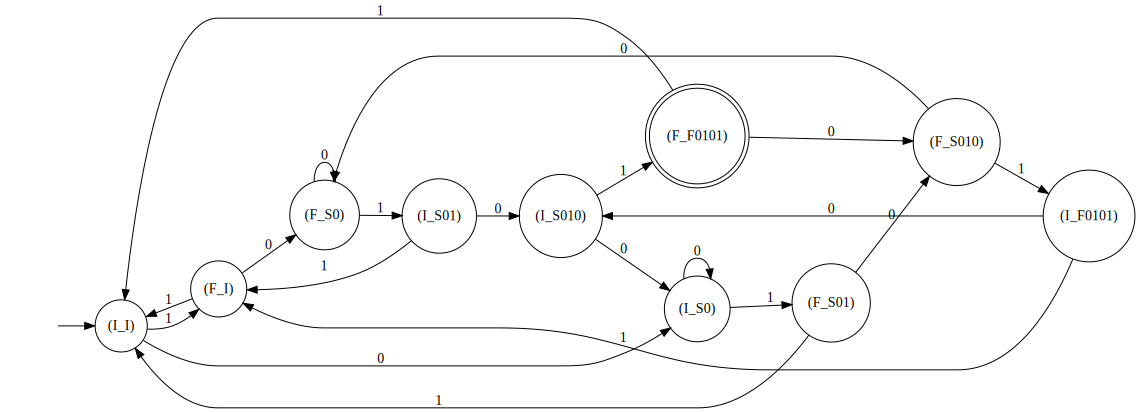

In [109]:
dotObj_dfa(odd1sANDends0101)

In [110]:
Minodd1sANDends0101 = min_dfa(odd1sANDends0101)

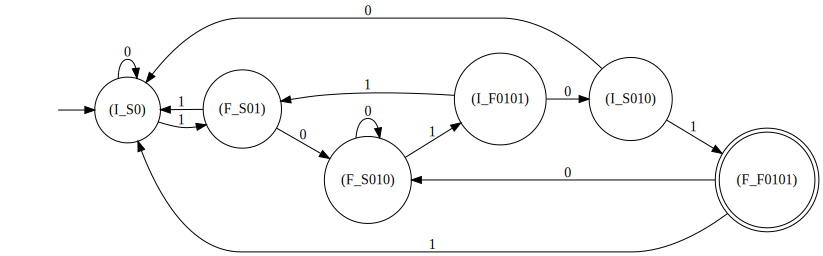

In [111]:
dotObj_dfa(Minodd1sANDends0101)

In [112]:
dotObj_dfa(Minodd1sANDends0101).source

'// do_St43\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\t"\\(I_F0101\\)" [label="\\(I_F0101\\)" peripheries=1 shape=circle]\n\t\t"\\(F_S01\\)" [label="\\(F_S01\\)" peripheries=1 shape=circle]\n\t\t"\\(I_S0\\)" [label="\\(I_S0\\)" peripheries=1 shape=circle]\n\t\t"\\(I_S010\\)" [label="\\(I_S010\\)" peripheries=1 shape=circle]\n\t\t"\\(F_S010\\)" [label="\\(F_S010\\)" peripheries=1 shape=circle]\n\t\t"\\(F_F0101\\)" [label="\\(F_F0101\\)" peripheries=2 shape=circle]\n\t\t\tEMPTY -> "\\(I_S0\\)"\n\t\t\t"\\(F_S010\\)" -> "\\(F_S010\\)" [label=0]\n\t\t\t"\\(I_F0101\\)" -> "\\(I_S010\\)" [label=0]\n\t\t\t"\\(I_S0\\)" -> "\\(F_S01\\)" [label=1]\n\t\t\t"\\(I_S010\\)" -> "\\(F_F0101\\)" [label=1]\n\t\t\t"\\(I_F0101\\)" -> "\\(F_S01\\)" [label=1]\n\t\t\t"\\(F_S01\\)" -> "\\(I_S0\\)" [label=1]\n\t\t\t"\\(I_S0\\)" -> "\\(I_S0\\)" [label=0]\n\t\t\t"\\(F_S010\\)" -> "\\(I_F0101\\)" [label=1]\n\t\t\t"\\(F_F0101\\)" -> "\\(I_S0\\)" [label=1]\n\t\t\t"\\(F_F0101\\)" -> "\

In [113]:
CdfaOdd1s = comp_dfa(dfaOdd1s)

In [114]:
Cends0101 = comp_dfa(ends0101)

In [115]:
C_CdfaOdd1sORCends0101 = comp_dfa(union_dfa(CdfaOdd1s, Cends0101))

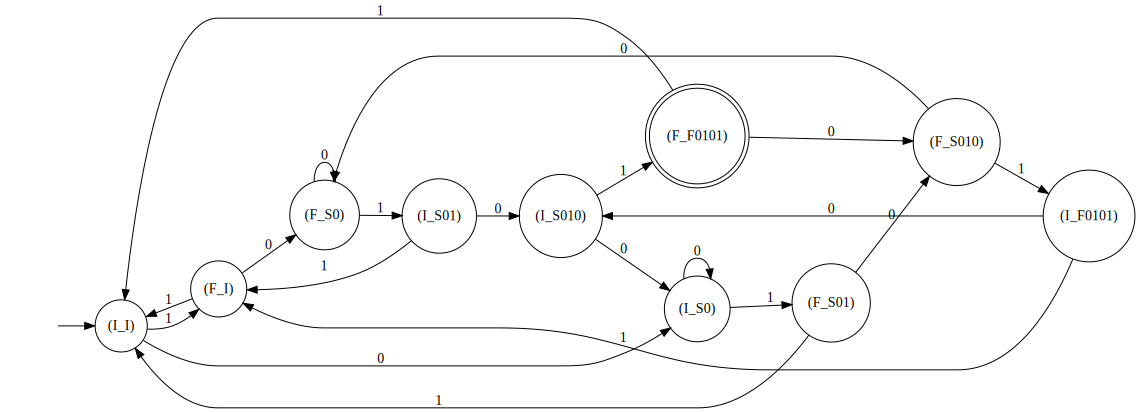

In [116]:
dotObj_dfa(C_CdfaOdd1sORCends0101)

In [117]:
MinC_CdfaOdd1sORCends0101 = min_dfa(C_CdfaOdd1sORCends0101)

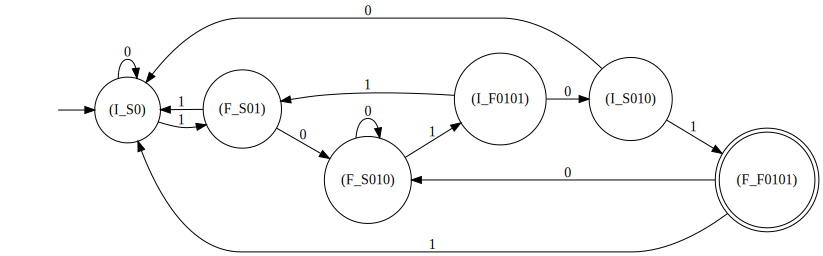

In [118]:
dotObj_dfa(MinC_CdfaOdd1sORCends0101)

In [119]:
iso_dfa(MinC_CdfaOdd1sORCends0101, Minodd1sANDends0101)

True

In [120]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')

In [121]:
dblimp = dotObj_dfa(blimp)

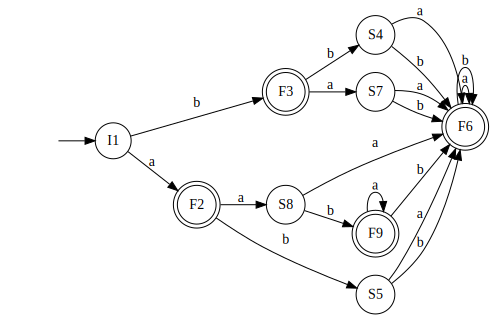

In [122]:
dblimp

In [123]:
dblimp = dotObj_dfa(blimp, FuseEdges=True)

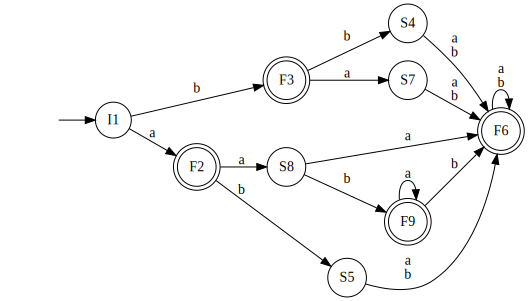

In [124]:
dblimp

In [125]:
dblimp.source

'// do_St47\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tS4 [label=S4 peripheries=1 shape=circle]\n\t\tS8 [label=S8 peripheries=1 shape=circle]\n\t\tS7 [label=S7 peripheries=1 shape=circle]\n\t\tI1 [label=I1 peripheries=1 shape=circle]\n\t\tS5 [label=S5 peripheries=1 shape=circle]\n\t\tF6 [label=F6 peripheries=2 shape=circle]\n\t\tF9 [label=F9 peripheries=2 shape=circle]\n\t\tF3 [label=F3 peripheries=2 shape=circle]\n\t\tF2 [label=F2 peripheries=2 shape=circle]\n\t\t\tEMPTY -> I1\n\t\t\tI1 -> F2 [label=a]\n\t\t\tI1 -> F3 [label=b]\n\t\t\tF2 -> S8 [label=a]\n\t\t\tF2 -> S5 [label=b]\n\t\t\tF3 -> S7 [label=a]\n\t\t\tF3 -> S4 [label=b]\n\t\t\tS4 -> F6 [label="a \n b"]\n\t\t\tS5 -> F6 [label="a \n b"]\n\t\t\tF6 -> F6 [label="a \n b"]\n\t\t\tS7 -> F6 [label="a \n b"]\n\t\t\tS8 -> F6 [label=a]\n\t\t\tS8 -> F9 [label=b]\n\t\t\tF9 -> F9 [label=a]\n\t\t\tF9 -> F6 [label=b]\n}'

In [126]:
mblimp = min_dfa(blimp)

In [127]:
dmblimp = dotObj_dfa(mblimp)

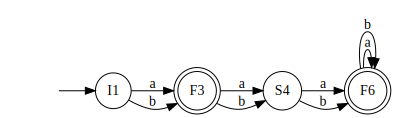

In [128]:
dmblimp

This shows how DeMorgan's Law applies to DFAs. It also shows how, using the tools provided to us, we can continually check our work.

In [129]:
testdfa = md2mc('''DFA
I : 0 -> I
I : 1 -> F
F : 0 -> I
''')

In [130]:
testdfa

{'Delta': {('F', '0'): 'I', ('I', '0'): 'I', ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'F', 'I'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

In [131]:
tot_testdfa = totalize_dfa(testdfa)

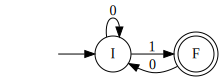

In [132]:
dotObj_dfa(tot_testdfa)

In [133]:
dotObj_dfa_w_bh

<function jove.DotBashers.dotObj_dfa_w_bh>

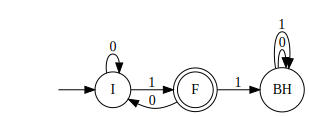

In [134]:
dotObj_dfa_w_bh(tot_testdfa)

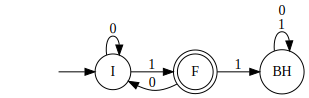

In [135]:
dotObj_dfa_w_bh(tot_testdfa, FuseEdges = True)